In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_datareader as web
from sklearn.preprocessing import MinMaxScaler
import numpy as np



import keras


In [9]:
data = web.get_data_yahoo('FB',start = "2010-01-01",
                            end = "2022-02-13")

train = web.get_data_yahoo("FB",
                            start = "2010-01-01",
                            end = "2022-01-14")

test = web.get_data_yahoo("FB",
                            start = "2022-01-14",
                            end = "2022-02-13")



train.shape

(2432, 6)

In [10]:
train_arr = np.array(train.Close).reshape(-1,1)
train_arr.shape

(2432, 1)

In [11]:
normalizer = MinMaxScaler((0,1))
normalized_train = normalizer.fit_transform(train)

In [12]:
inputs = list()
targets = list()

lr_days = 60
train_len = train_arr.shape[0]

for day in range(lr_days, train_len):
    
    inputs.append(normalized_train[day-lr_days:day, 0])
    
    targets.append(normalized_train[day, 0])
    
inputs = np.array(inputs)
inputs = np.reshape(inputs, (inputs.shape[0], inputs.shape[1], 1))
targets = np.array(targets)
print(inputs.shape)
print(targets)#5486

(2372, 60, 1)
[0.00909687 0.00857783 0.00603726 ... 0.86898325 0.86696175 0.85903956]


In [13]:
lstm_net = keras.Sequential(
    [
    
    keras.layers.LSTM(50, return_sequences = True, input_shape = (inputs.shape[1], 1)),
    keras.layers.Dropout(0.1),
    keras.layers.LSTM(50, return_sequences = True),
    keras.layers.Dropout(0.1),
    keras.layers.LSTM(50, return_sequences = True),
    keras.layers.Dropout(0.1),
    keras.layers.LSTM(50, return_sequences = True),
    keras.layers.Dropout(0.1),
    keras.layers.LSTM(50, return_sequences = True),
    keras.layers.Dropout(0.1),
    keras.layers.LSTM(50, return_sequences = True),
    keras.layers.Dropout(0.1),
    keras.layers.LSTM(50, return_sequences = True),
    keras.layers.Dropout(0.1),


    keras.layers.LSTM(50),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(units=1)

    ]
)

In [14]:
inputs.shape[1]

60

In [15]:
lstm_net.compile(
    optimizer = 'adam', 
    metrics = ['accuracy'],
    loss = 'mean_squared_error')

In [16]:
lstm_net.fit(inputs, targets, epochs = 80, batch_size = 32)

Epoch 1/80
75/75 [==============================] - 298s 259ms/step - loss: 0.0166 - accuracy: 8.4317e-04
Epoch 2/80
75/75 [==============================] - 22s 302ms/step - loss: 0.0029 - accuracy: 8.4317e-04
Epoch 3/80
75/75 [==============================] - 18s 237ms/step - loss: 0.0028 - accuracy: 8.4317e-04
Epoch 4/80
75/75 [==============================] - 22s 291ms/step - loss: 0.0024 - accuracy: 8.4317e-04
Epoch 5/80
75/75 [==============================] - 18s 240ms/step - loss: 0.0020 - accuracy: 8.4317e-04
Epoch 6/80
75/75 [==============================] - 15s 208ms/step - loss: 0.0026 - accuracy: 8.4317e-04
Epoch 7/80
75/75 [==============================] - 10s 129ms/step - loss: 0.0020 - accuracy: 8.4317e-04
Epoch 8/80
75/75 [==============================] - 17s 223ms/step - loss: 0.0019 - accuracy: 8.4317e-04
Epoch 9/80
75/75 [==============================] - 11s 151ms/step - loss: 0.0023 - accuracy: 8.4317e-04
Epoch 10/80
75/75 [==============================] - 8

75/75 [==============================] - 3s 42ms/step - loss: 5.8892e-04 - accuracy: 8.4317e-04
Epoch 78/80
75/75 [==============================] - 3s 43ms/step - loss: 5.5794e-04 - accuracy: 8.4317e-04
Epoch 79/80
75/75 [==============================] - 3s 39ms/step - loss: 5.4113e-04 - accuracy: 8.4317e-04
Epoch 80/80
75/75 [==============================] - 3s 37ms/step - loss: 5.6995e-04 - accuracy: 8.4317e-04


In [21]:
print(lstm_net.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_1 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_2 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_3 (LSTM)               (None, 60, 50)            2

In [22]:
test_targets = np.array(test.Close).reshape(-1,1)
test_targets.shape


(20, 1)

In [23]:


days_all = data.shape[0]
days_test = test.shape[0]

days_rem = days_all-lr_days-days_test
test_x = normalizer.fit_transform(np.array(data.Close[days_rem:]).reshape(-1,1))

last_day = lr_days + days_test
test_i = list()
for day in range(lr_days, last_day):
    
    test_i.append(test_x[day-lr_days:day, 0])
    
test_i = np.array(test_i)

preds = normalizer.inverse_transform(lstm_net.predict(test_i))




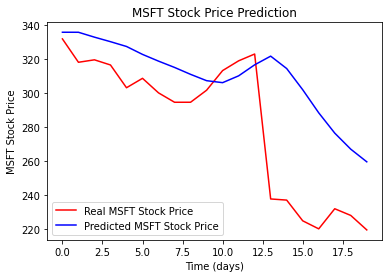

In [24]:
plt.plot(test_targets, color = 'red', label = 'Real MSFT Stock Price')
plt.plot(preds, color = 'blue', label = 'Predicted MSFT Stock Price')
plt.title('MSFT Stock Price Prediction')
plt.xlabel('Time (days)')
plt.ylabel('MSFT Stock Price')
plt.legend()
plt.show()

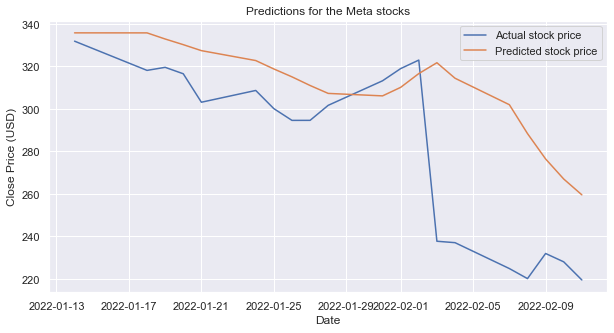

In [30]:
sns.set()
fig = plt.figure(figsize = (10,5))

sns.lineplot(x=test.index,y=test['Close'])
sns.lineplot(x=test.index,y=np.squeeze(preds)).set(title='Predictions for the Meta stocks')
plt.legend(labels=["Actual stock price","Predicted stock price"])

plt.ylabel("Close Price (USD)")

plt.show()
fig.savefig('FB.png') 
plt.close(fig) 

In [166]:
# testing the code using other datasets